In [2]:
import pandas as pd
import league_data_fetcher
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pickle
import json
import requests as rq

In [5]:
fpl_list = []
for i in range(1,3):
    fpl_list.append(league_data_fetcher.Fetcher(0.01, 27964, i))
#with open(r"fpl_obj_league_62649_gw_6.pickle", "rb") as input_file:
#    fpl = pickle.load(input_file)

Status code: 200
Page #1 saved, sleeping for 0.01 s
Status code: 200
Page #1 saved, sleeping for 0.01 s
Fetching league entries
Status code: 200
Entry #1 saved, sleeping for 0.01 s
Status code: 200
Entry #2 saved, sleeping for 0.01 s
Status code: 200
Entry #3 saved, sleeping for 0.01 s
Status code: 200
Entry #4 saved, sleeping for 0.01 s
Status code: 200
Entry #5 saved, sleeping for 0.01 s
Status code: 200
Entry #6 saved, sleeping for 0.01 s
Status code: 200
Entry #7 saved, sleeping for 0.01 s
Status code: 200
Entry #8 saved, sleeping for 0.01 s
Status code: 200
Entry #9 saved, sleeping for 0.01 s
Status code: 200
Entry #10 saved, sleeping for 0.01 s
Status code: 200
Entry #11 saved, sleeping for 0.01 s
Status code: 200
Entry #12 saved, sleeping for 0.01 s
Status code: 200
Entry #13 saved, sleeping for 0.01 s
Status code: 200
Entry #14 saved, sleeping for 0.01 s
Status code: 200
Entry #15 saved, sleeping for 0.01 s
Status code: 200
Entry #16 saved, sleeping for 0.01 s
Status code: 200


In [6]:
df_list = []

for fpl in fpl_list:
    df_dict = {}
    
    df_dict['team_name'] = [v.team_name for v in fpl.team_dict.values()]
    df_dict['entry'] = [v.entry for v in fpl.team_dict.values()]
    df_dict['country'] = [v.country for v in fpl.team_dict.values()]
    df_dict['total_points'] = [v.aggregate('total_points', 'sum') for v in fpl.team_dict.values()]
    df_dict['transfer_cost'] = [v.event_transfers_cost for v in fpl.team_dict.values()]
    df_dict['was_home'] = [v.aggregate('was_home', 'sum') for v in fpl.team_dict.values()]
    df_dict['minutes'] = [v.aggregate('minutes', 'sum') for v in fpl.team_dict.values()]
    df_dict['goals_scored'] = [v.aggregate('goals_scored', 'sum') for v in fpl.team_dict.values()]
    df_dict['assists'] = [v.aggregate('assists', 'sum') for v in fpl.team_dict.values()]
    df_dict['clean_sheets'] = [v.aggregate('clean_sheets', 'sum') for v in fpl.team_dict.values()]
    df_dict['goals_conceded'] = [v.aggregate('goals_conceded', 'sum') for v in fpl.team_dict.values()]
    df_dict['own_goals'] = [v.aggregate('own_goals', 'sum') for v in fpl.team_dict.values()]
    df_dict['penalties_saved'] = [v.aggregate('penalties_saved', 'sum') for v in fpl.team_dict.values()]
    df_dict['penalties_missed'] = [v.aggregate('penalties_missed', 'sum') for v in fpl.team_dict.values()]
    df_dict['yellow_cards'] = [v.aggregate('yellow_cards', 'sum') for v in fpl.team_dict.values()]
    df_dict['red_cards'] = [v.aggregate('red_cards', 'sum') for v in fpl.team_dict.values()]
    df_dict['saves'] = [v.aggregate('saves', 'sum') for v in fpl.team_dict.values()]
    df_dict['bonus'] = [v.aggregate('bonus', 'sum') for v in fpl.team_dict.values()]
    df_dict['bps'] = [v.aggregate('bps', 'sum') for v in fpl.team_dict.values()]
    df_dict['influence'] = [v.aggregate('influence', 'sum') for v in fpl.team_dict.values()]
    df_dict['creativity'] = [v.aggregate('creativity', 'sum') for v in fpl.team_dict.values()]
    df_dict['threat'] = [v.aggregate('threat', 'sum') for v in fpl.team_dict.values()]
    df_dict['ict_index'] = [v.aggregate('ict_index', 'sum') for v in fpl.team_dict.values()]
    df_dict['starts'] = [v.aggregate('starts', 'sum') for v in fpl.team_dict.values()]
    df_dict['expected_goals'] = [v.aggregate('expected_goals', 'sum') for v in fpl.team_dict.values()]
    df_dict['expected_assists'] = [v.aggregate('expected_assists', 'sum') for v in fpl.team_dict.values()]
    df_dict['expected_goal_involvements'] = [v.aggregate('expected_goal_involvements', 'sum') for v in fpl.team_dict.values()]
    df_dict['expected_goals_conceded'] = [v.aggregate('expected_goals_conceded', 'sum') for v in fpl.team_dict.values()]
    df_dict['value'] = [v.aggregate('value', 'sum') for v in fpl.team_dict.values()]
    df_dict['xp'] = [v.aggregate('xp', 'sum') for v in fpl.team_dict.values()]
    df_dict['gw'] = [fpl.gw for v in fpl.team_dict.values()]
    df_dict['wrc'] = [v.aggregate('wrc', 'sum') for v in fpl.team_dict.values()]
    
    sum_wrl = sum([player.wrl for player in fpl.player_dict.values()])
    
    df_dict['wrl'] = [sum_wrl - v.aggregate('wrl', 'sum') for v in fpl.team_dict.values()]
    df_dict['wrc_ratio'] = list(np.array(df_dict['wrc']) / np.array(df_dict['wrl']))
    
    df_list.append(pd.DataFrame(df_dict))

In [7]:
df = pd.concat(df_list, ignore_index=True)
df['acc_points'] = df.groupby('entry')['total_points'].cumsum()

In [8]:
df

,team_name,entry,country,total_points,transfer_cost,was_home,minutes,goals_scored,assists,clean_sheets,...,expected_assists,expected_goal_involvements,expected_goals_conceded,value,xp,gw,wrc,wrl,wrc_ratio,acc_points
0,"Earth,windandmaguire",7818211,Norway,66,0,9,932,4,4,3,...,2.49,5.83,15.82,1000,63.7,1,46.168889,22.151111,2.084270,66
1,greatballsonfire,6419537,Norway,62,0,11,1028,3,3,3,...,2.07,4.10,19.08,1000,59.3,1,37.737778,18.120000,2.082659,62
2,Iniestas mormor,585573,Sweden,70,0,10,1143,4,3,4,...,2.68,6.31,17.51,1000,43.9,1,27.488889,23.271111,1.181245,70
3,DaviesDynamos,7930723,Sweden,57,0,8,1110,4,2,3,...,1.83,5.53,19.02,965,45.0,1,32.642222,27.324444,1.194616,57
4,Bearcubs,695036,Sweden,48,0,9,688,4,2,2,...,1.47,3.61,10.79,1000,41.9,1,27.960000,25.742222,1.086153,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Jans bävrar,5173578,Sweden,35,0,10,834,1,0,5,...,0.46,2.53,9.91,999,47.7,2,34.945652,26.752174,1.306273,71
89,NK,3467396,Sweden,38,8,8,901,0,2,5,...,1.14,2.42,10.61,981,30.9,2,22.706522,31.313043,0.725146,95
90,DieRenners,2653374,Sweden,42,0,9,872,1,1,6,...,0.63,1.58,12.75,993,58.6,2,51.419565,32.326087,1.590652,90
91,Glazers out,7375419,Norway,47,0,6,1076,1,0,5,...,1.44,3.04,18.07,998,45.1,2,33.886957,28.293478,1.197695,123


In [10]:
fpl_list[8].entry_history#[1416075]

{7818211: {'event': 9,
  'points': 87,
  'total_points': 589,
  'rank': 1305990,
  'rank_sort': 1322649,
  'overall_rank': 137842,
  'bank': 2,
  'value': 998,
  'event_transfers': 2,
  'event_transfers_cost': 0,
  'points_on_bench': 1},
 6419537: {'event': 9,
  'points': 75,
  'total_points': 588,
  'rank': 3400672,
  'rank_sort': 3450197,
  'overall_rank': 149849,
  'bank': 10,
  'value': 1005,
  'event_transfers': 1,
  'event_transfers_cost': 0,
  'points_on_bench': 2},
 585573: {'event': 9,
  'points': 89,
  'total_points': 583,
  'rank': 952541,
  'rank_sort': 959216,
  'overall_rank': 208123,
  'bank': 1,
  'value': 1013,
  'event_transfers': 0,
  'event_transfers_cost': 0,
  'points_on_bench': 3},
 7930723: {'event': 9,
  'points': 87,
  'total_points': 564,
  'rank': 1200228,
  'rank_sort': 1258808,
  'overall_rank': 570648,
  'bank': 17,
  'value': 1010,
  'event_transfers': 0,
  'event_transfers_cost': 0,
  'points_on_bench': 4},
 695036: {'event': 9,
  'points': 69,
  'total

In [9]:
fpl_list[8].gw

9

In [7]:
df.to_pickle('league_62649_gw_6.pickle')

In [8]:
with open('fpl_obj_league_62649_gw_6.pickle', 'wb') as f:
    pickle.dump(fpl, f)

In [9]:
sns.set(rc={'figure.figsize':(16,9), "figure.dpi":300, 'savefig.dpi':300})

/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipengstrom/Desktop/programmering/fpl_league_ass

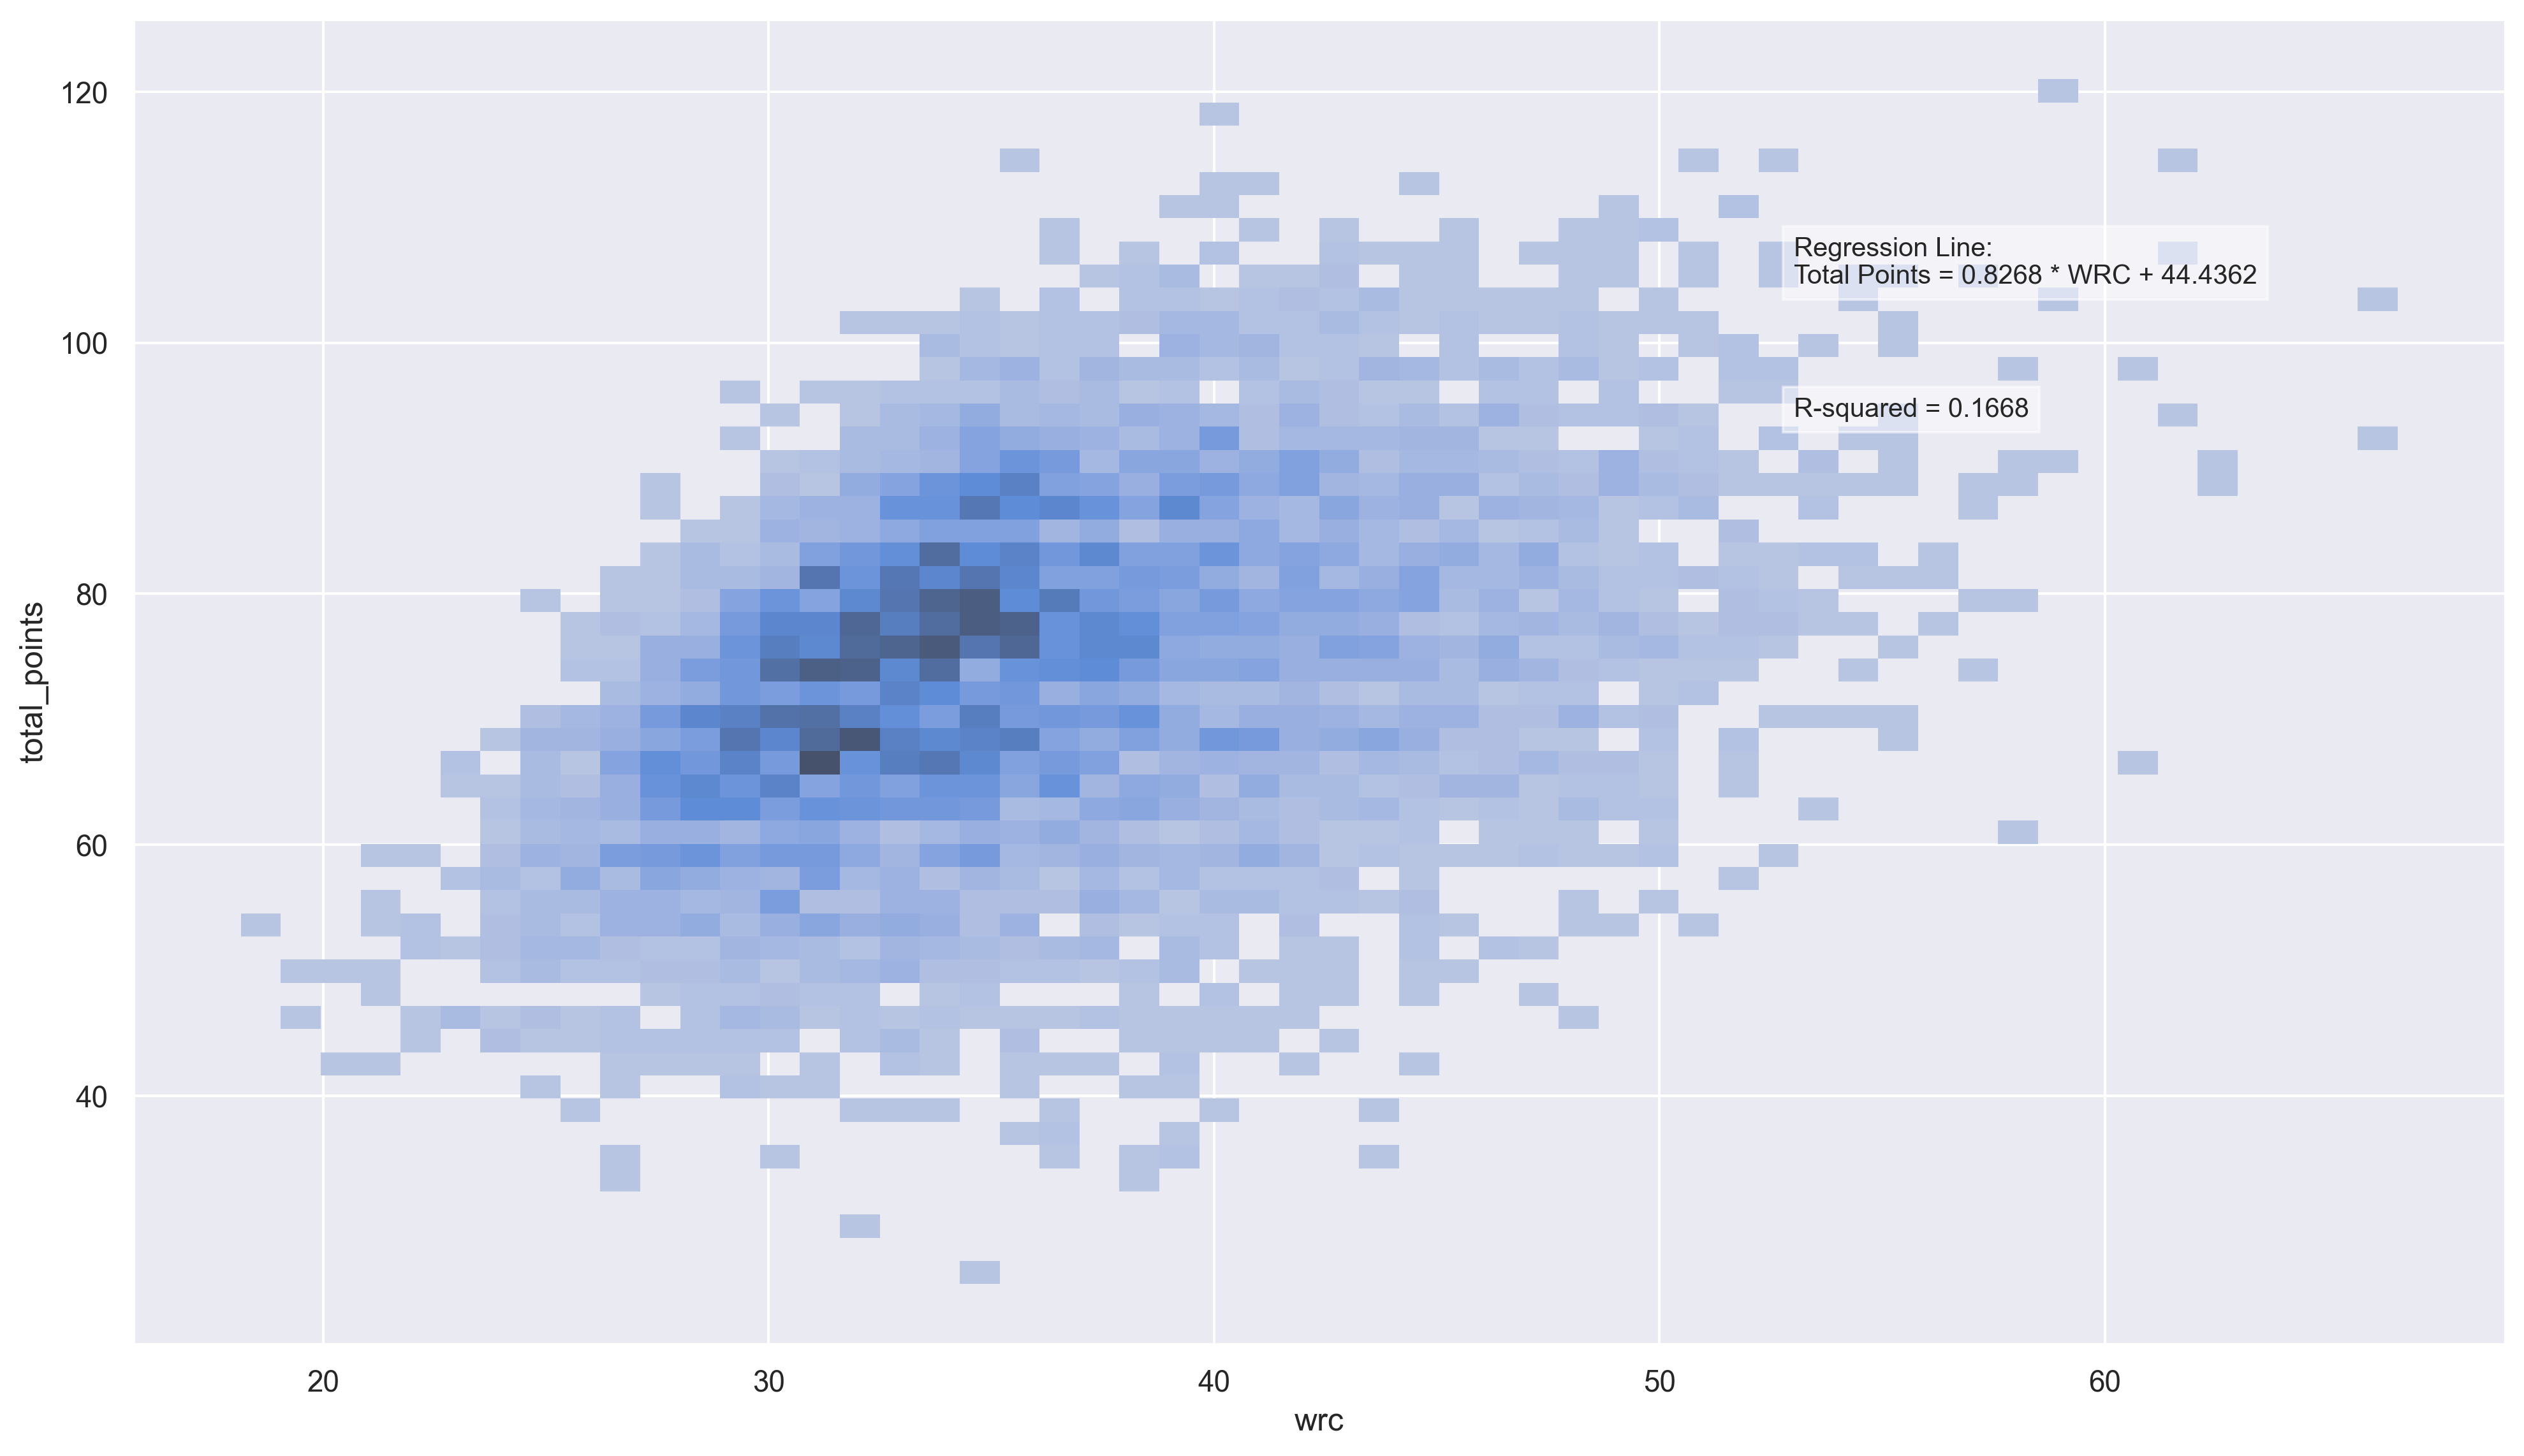

In [10]:
sns.histplot(data=df, x='wrc', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrc'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRC + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipengstrom/Desktop/programmering/fpl_league_ass

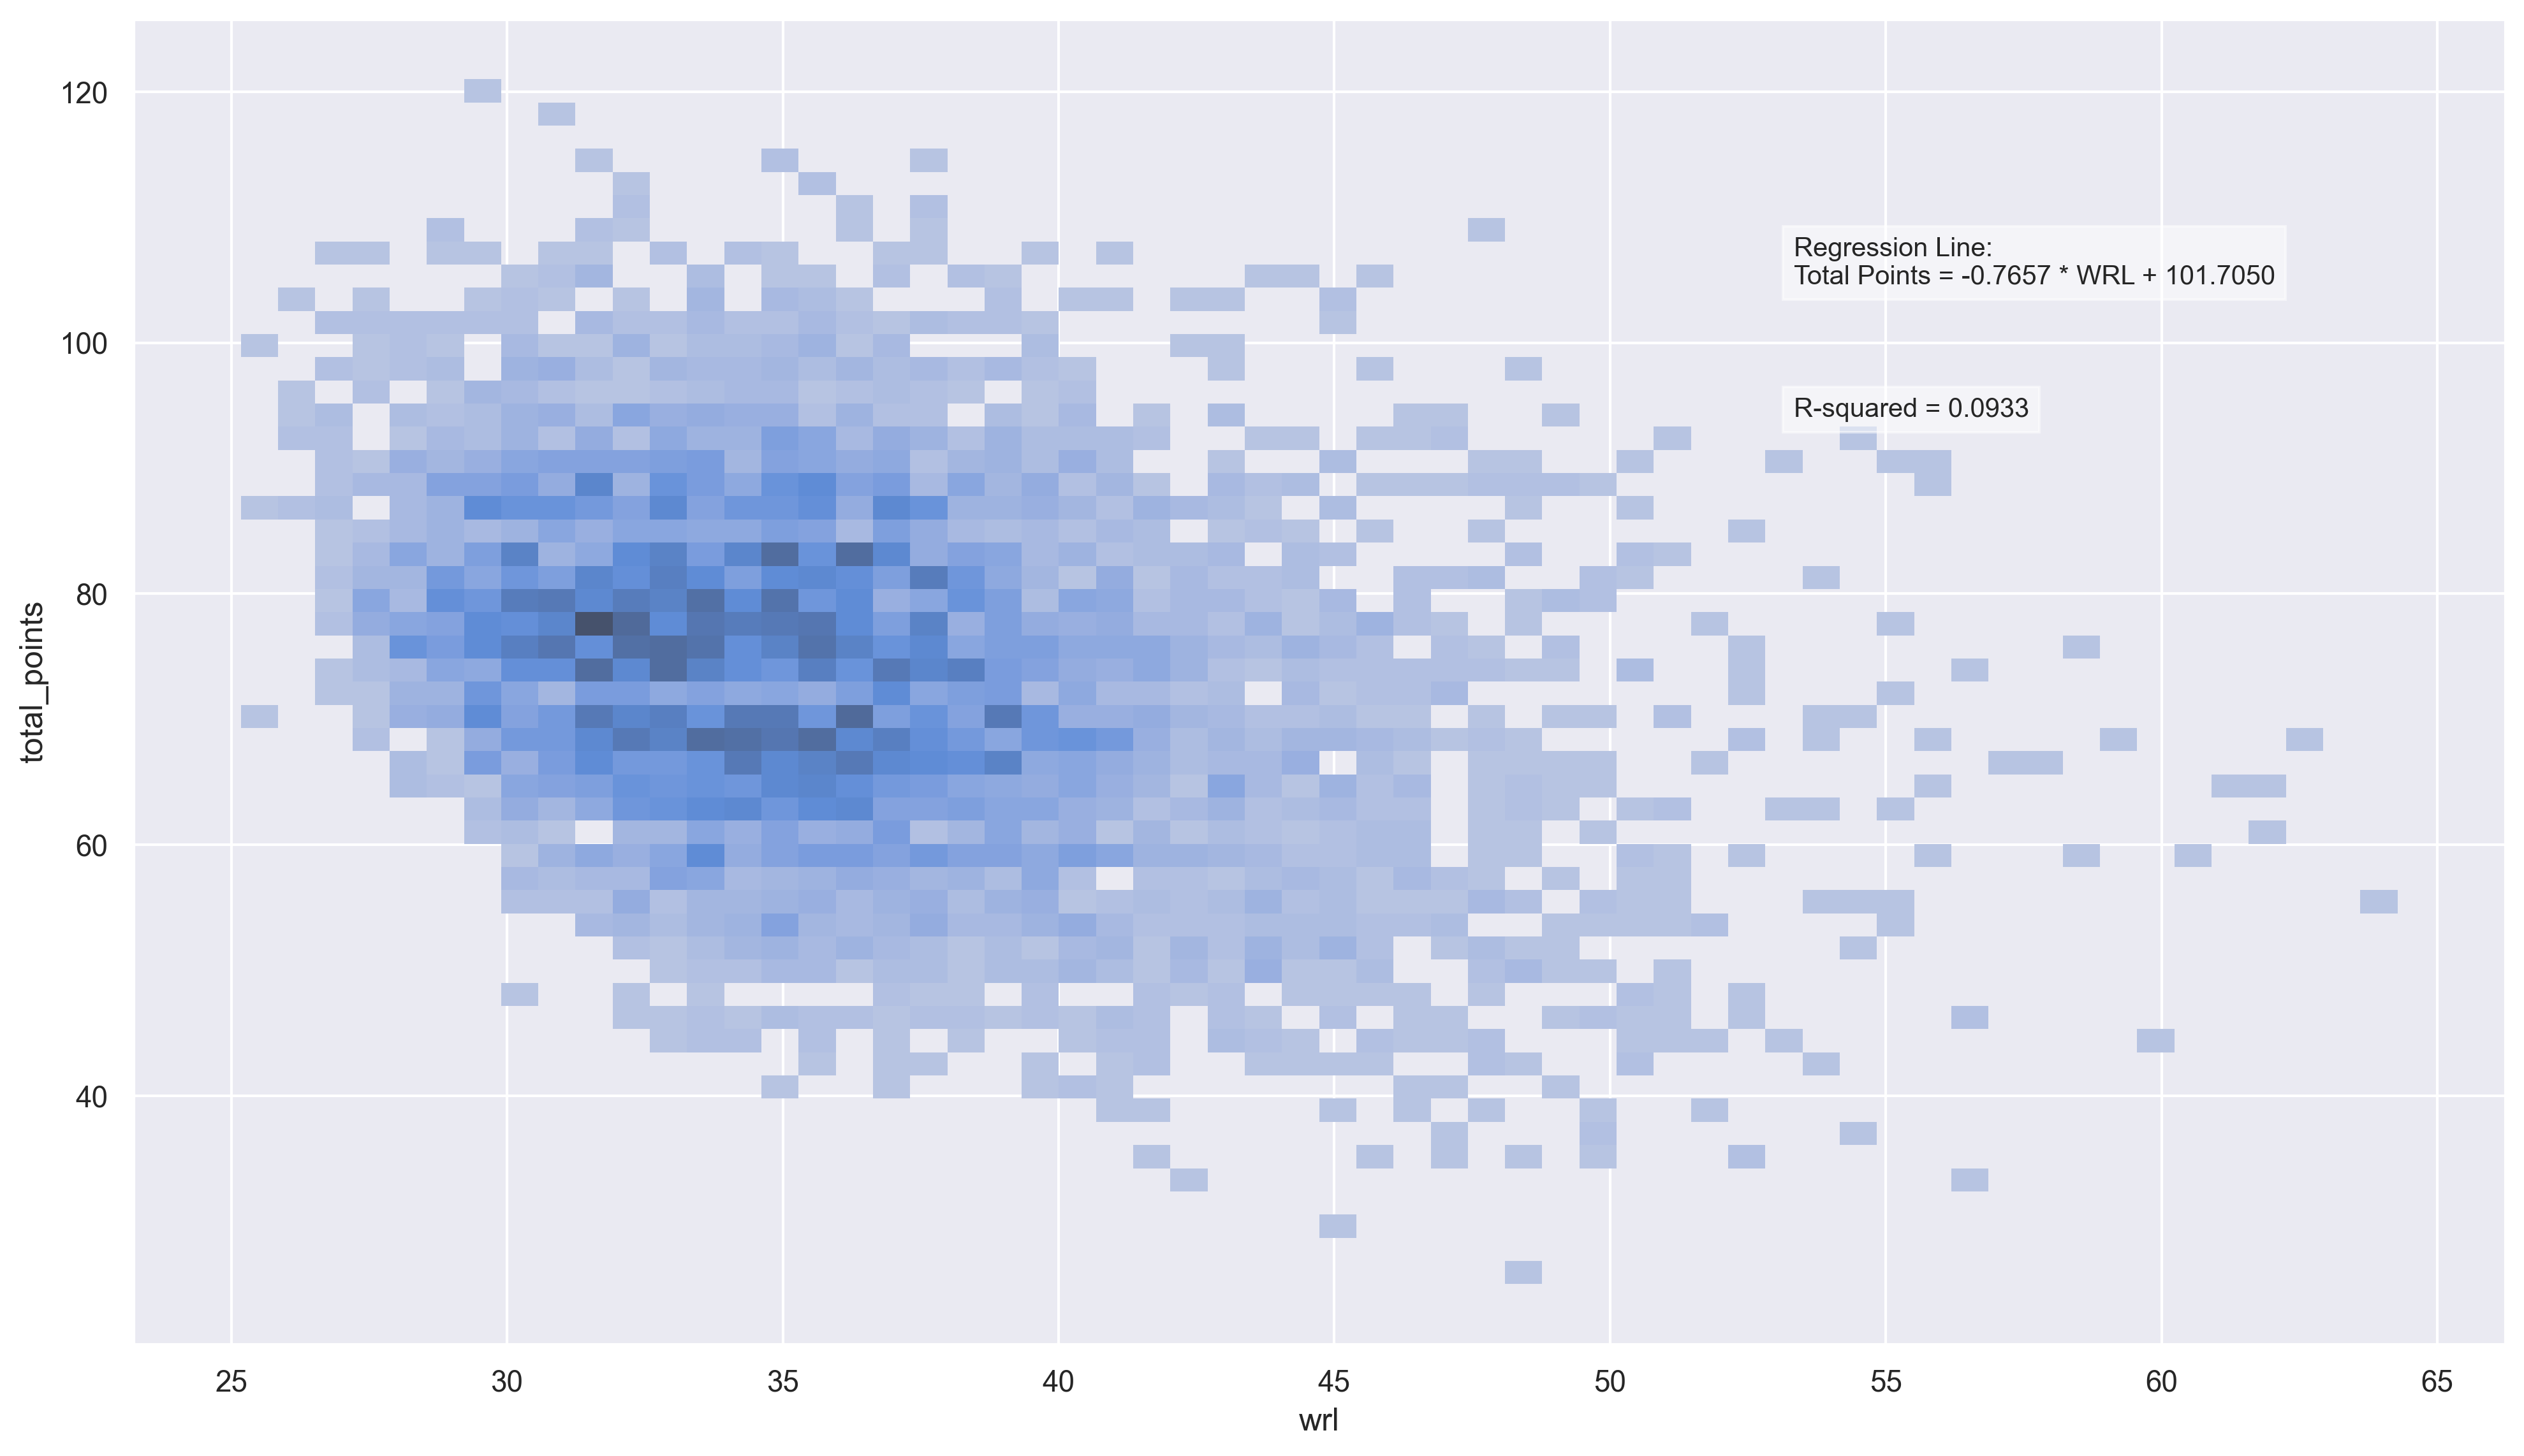

In [11]:
sns.histplot(data=df, x='wrl', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrl'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRL + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipengstrom/Desktop/programmering/fpl_league_ass

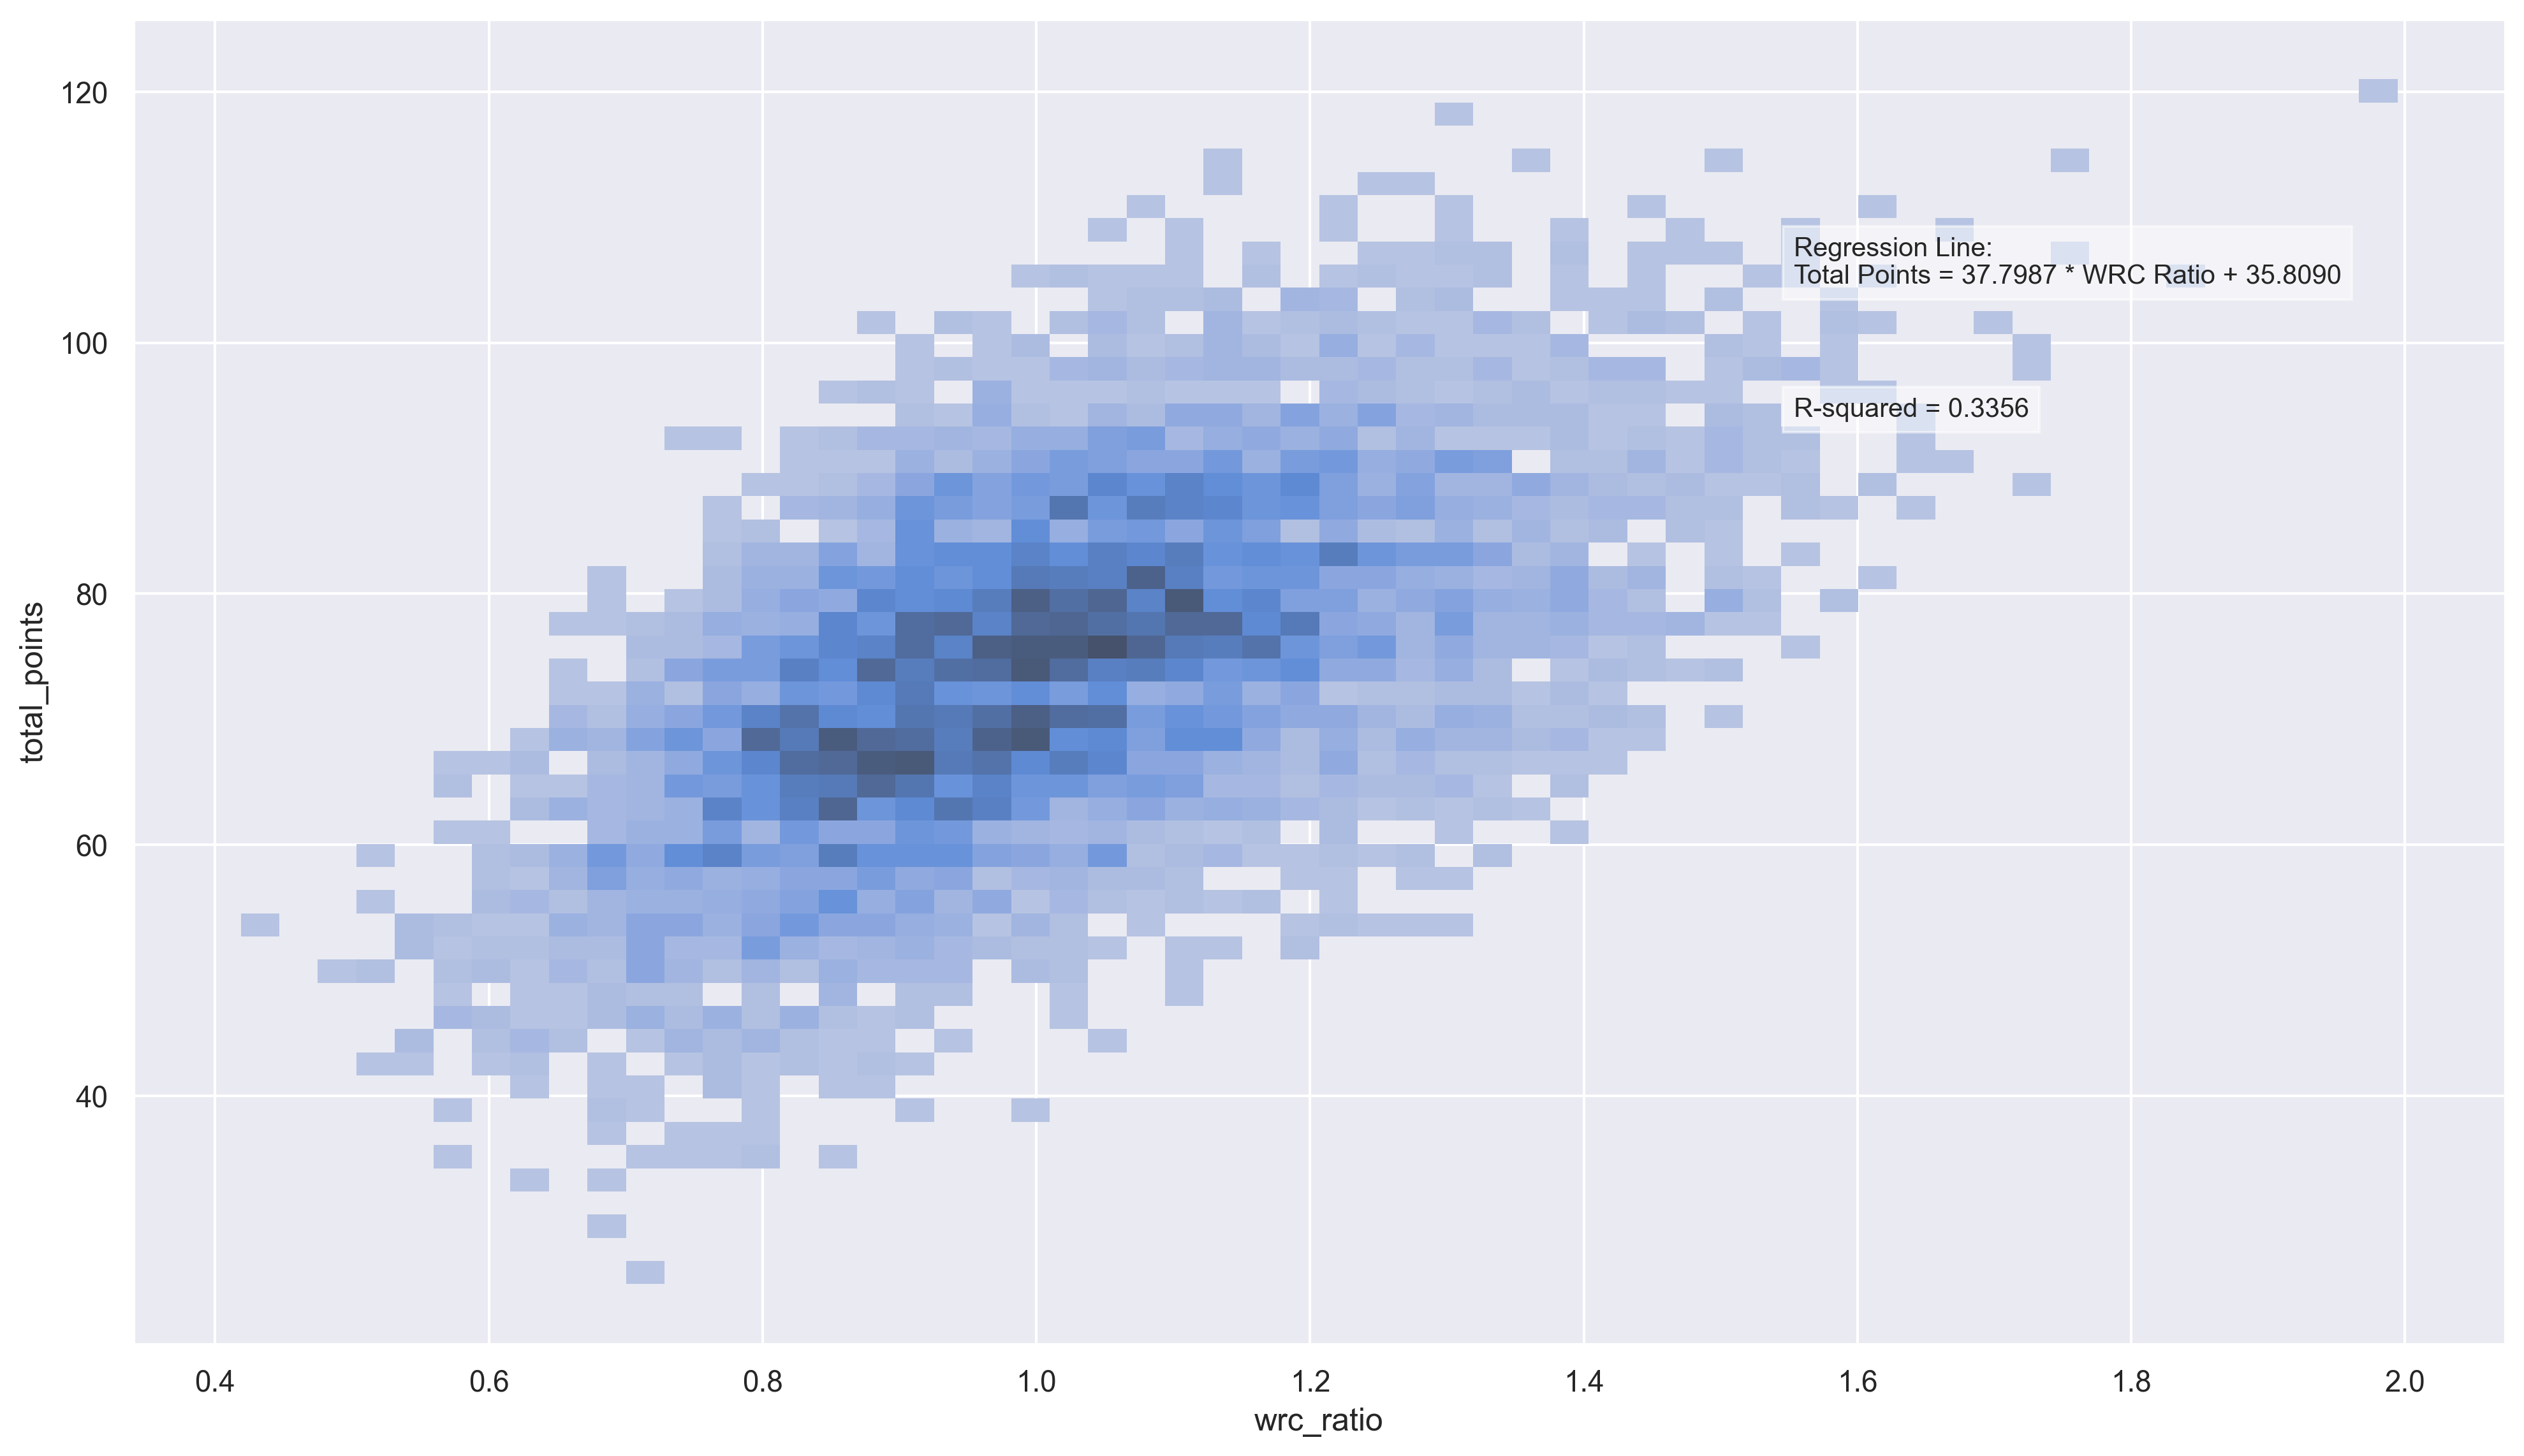

In [12]:
sns.histplot(data=df, x='wrc_ratio', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['wrc_ratio'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * WRC Ratio + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/filipengstrom/Desktop/programmering/fpl_league_assistant/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/filipengstrom/Desktop/programmering/fpl_league_ass

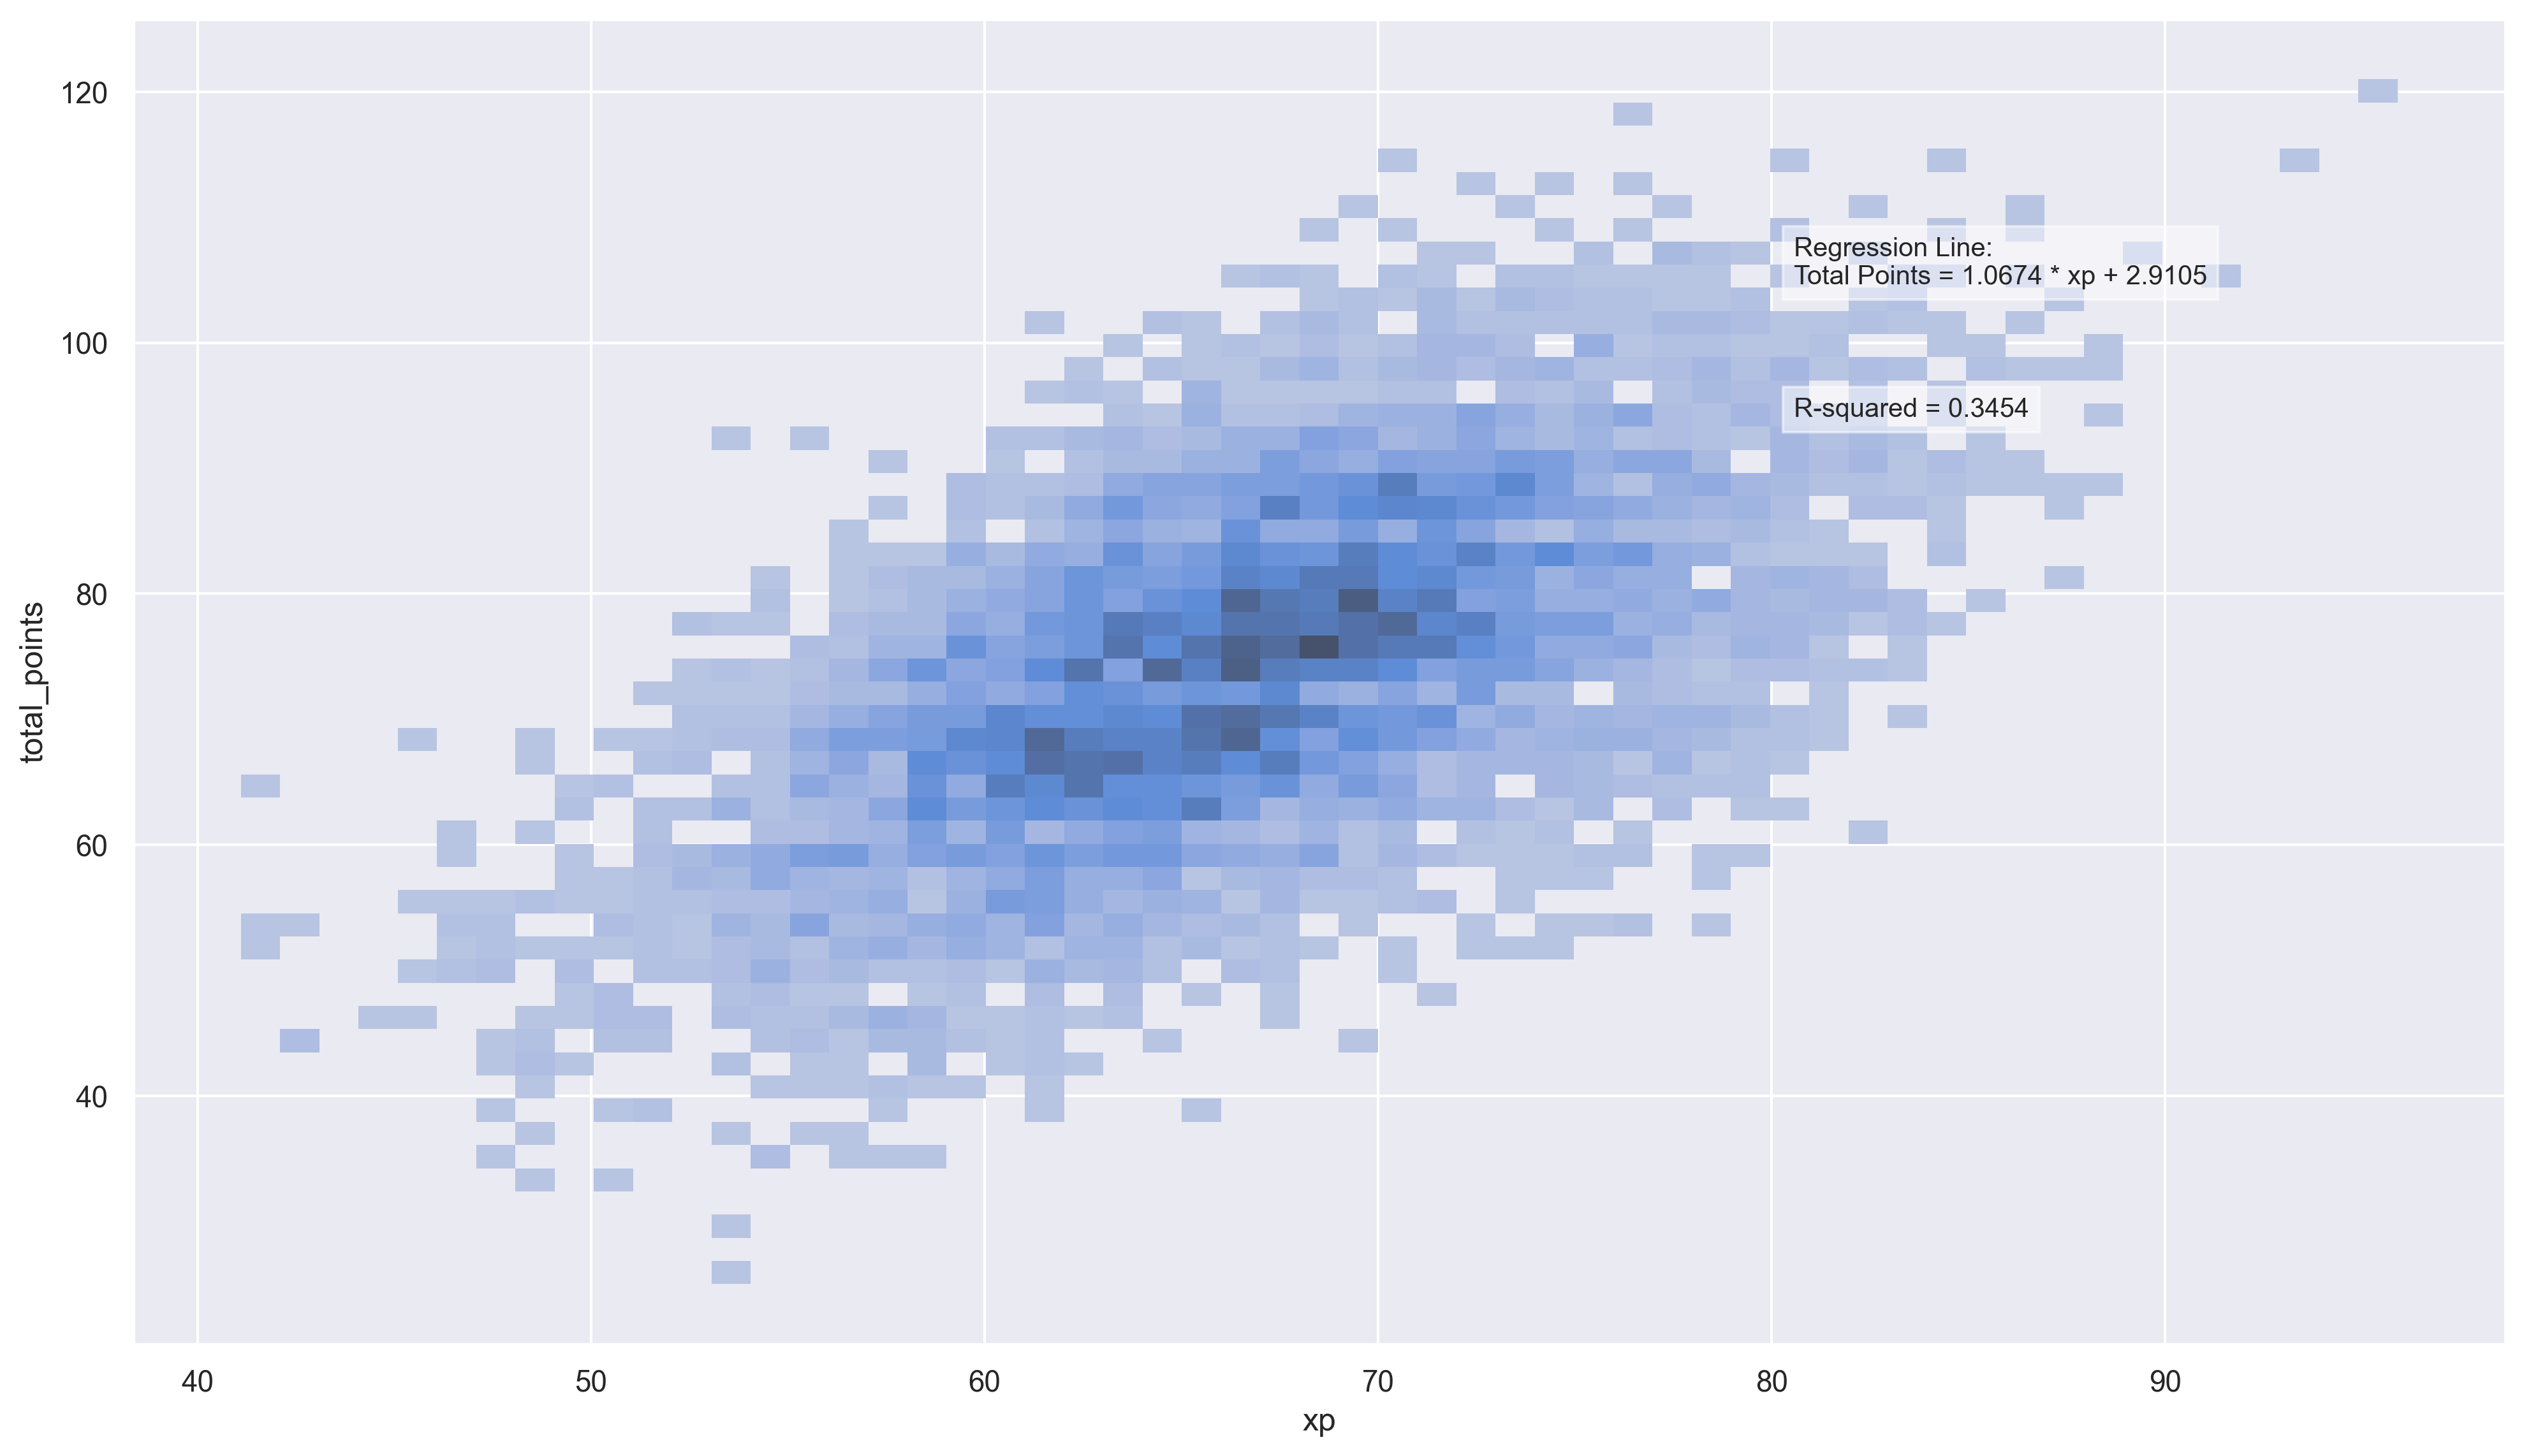

In [13]:
sns.histplot(data=df, x='xp', y='total_points')

slope, intercept, r_value, p_value, std_err = linregress(df['xp'], df['total_points'])
r_squared = r_value ** 2

equation_text = f"Regression Line:\nTotal Points = {slope:.4f} * xp + {intercept:.4f}"
r_squared_text = f"R-squared = {r_squared:.4f}"

plt.text(0.7, 0.8, equation_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.7, 0.7, r_squared_text, transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

In [5]:
df[df['entry'].isin([82846, 15644, 21482])]

,team_name,entry,country,total_points,was_home,minutes,goals_scored,assists,clean_sheets,goals_conceded,...,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,value,xp,wrc,wrl,wrc_ratio
536,Pick of Destiny,82846,Sweden,89,9,1297,5,5,6,14,...,15,3.14,1.42,4.56,17.69,1006,74.0,36.967275,29.660330,1.246354
2441,El grande mums!,15644,Sweden,79,9,1224,4,6,5,21,...,14,3.23,1.87,5.10,19.63,1006,71.9,34.259441,29.052496,1.179225
4764,Finnboda Hotspur FC,21482,Sweden,73,8,1212,5,3,6,17,...,14,3.55,0.64,4.19,19.78,1002,73.9,49.885382,42.678436,1.168866


In [2]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
bootstrap: json = rq.get(url).json()

In [6]:
dict_xp = {}
position_dict: dict = {1: 'GOAL', 2: 'DEF', 3: 'MID', 4: 'FWD'}

dict_xp['first_name'] = [player['first_name'] for player in bootstrap['elements']]
dict_xp['second_name'] = [player['second_name'] for player in bootstrap['elements']]
dict_xp['position'] = [position_dict[int(player['element_type'])] for player in bootstrap['elements']]
dict_xp['id'] = [player['id'] for player in bootstrap['elements']]
dict_xp['value'] = [int(player['now_cost']) for player in bootstrap['elements']]
dict_xp['xp'] = [float(player['ep_this']) for player in bootstrap['elements']]
dict_xp['selected'] = [float(player['selected_by_percent']) / 100 for player in bootstrap['elements']]

df_xp = pd.DataFrame(dict_xp)

df_xp['wrc'] = (1 - df_xp['selected']) * df_xp['xp']
df_xp['wrl'] = df_xp['selected'] * df_xp['xp']
df_xp['wrc_ratio'] = df_xp['wrc'] / df_xp['wrl']

df_xp = df_xp[(df_xp['selected'] > 0) & (df_xp['wrc_ratio'] < 30) & (df_xp['position'] == 'FWD')].sort_values(by='wrc', ascending=False)
df_xp

,first_name,second_name,position,id,value,xp,selected,wrc,wrl,wrc_ratio
57,Ollie,Watkins,FWD,60,82,12.3,0.329,8.2533,4.0467,2.039514
517,Alexander,Isak,FWD,415,75,8.5,0.203,6.7745,1.7255,3.926108
407,Carlton,Morris,FWD,326,56,4.5,0.066,4.2030,0.2970,14.151515
365,Darwin,Núñez Ribeiro,FWD,293,74,4.2,0.132,3.6456,0.5544,6.575758
437,Julián,Álvarez,FWD,343,71,4.2,0.329,2.8182,1.3818,2.039514
238,Nicolas,Jackson,FWD,211,69,2.8,0.049,2.6628,0.1372,19.408163
496,Rasmus,Højlund,FWD,617,72,2.5,0.071,2.3225,0.1775,13.084507
129,Yoane,Wissa,FWD,119,59,2.5,0.098,2.2550,0.2450,9.204082
6,Gabriel,Fernando de Jesus,FWD,8,79,2.2,0.035,2.1230,0.0770,27.571429
11,Eddie,Nketiah,FWD,13,55,2.2,0.051,2.0878,0.1122,18.607843


In [22]:
fpl.team_dict[21482].player_dict